In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
from datetime import datetime
# Muat dataset
df = pd.read_csv('line_messenger_reviews.csv')

In [ ]:
# 2. EDA (Exploratory Data Analysis)
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Descriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (7000, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userName       7000 non-null   object 
 1   content        7000 non-null   object 
 2   score          7000 non-null   int64  
 3   at             7000 non-null   object 
 4   thumbsUpCount  7000 non-null   int64  
 5   replyContent   0 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 328.3+ KB
None

Dataset Descriptive Statistics:
             score  thumbsUpCount  replyContent
count  7000.000000    7000.000000           0.0
mean      2.242286       6.143857           NaN
std       1.665441      63.308729           NaN
min       1.000000       0.000000           NaN
25%       1.000000       0.000000           NaN
50%       1.000000       0.000000           NaN
75%       4.000000       1.000000           NaN
max       5.0000

In [ ]:
# Converting to datetime and extracting year
try:
    df['year'] = pd.to_datetime(df['at']).dt.year
except:
    # If 'at' column doesn't exist or has a different format
    print("Could not extract year from date column. Check the column name and format.")

<ipython-input-5-824989b41ab6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


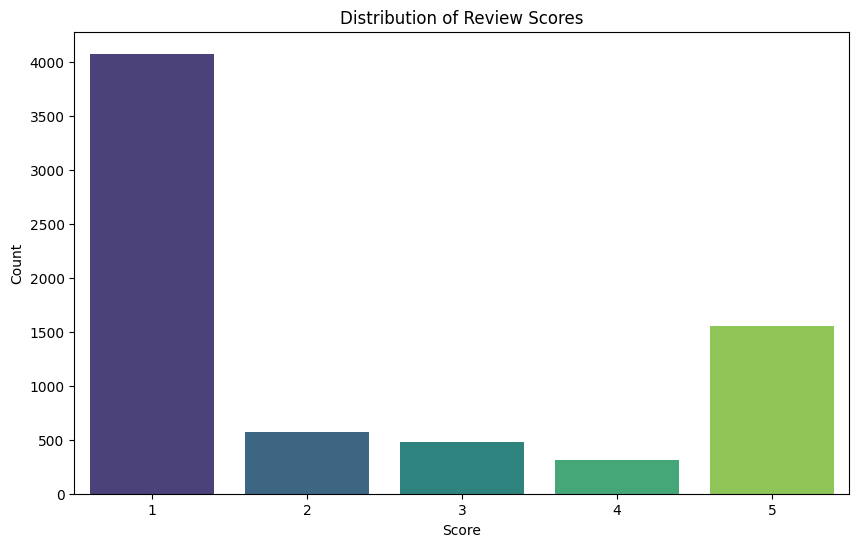

In [ ]:
# Visualizations for EDA

# 1. Distribution of scores
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.savefig('score_distribution.png')

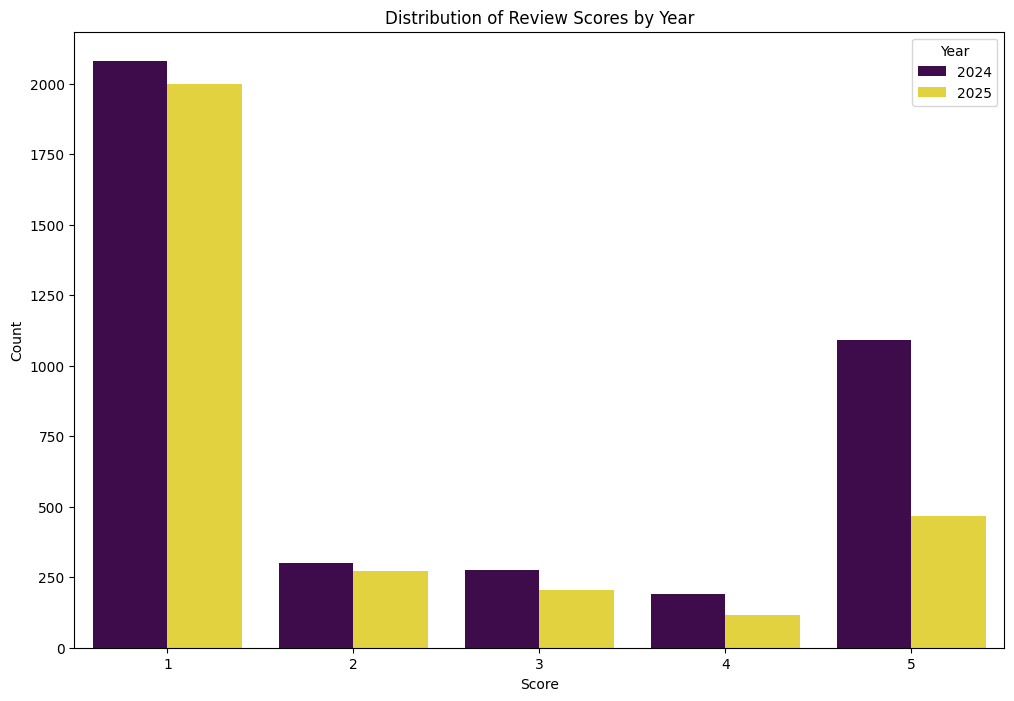

In [ ]:
# 2. Distribution of scores by year (if year extraction was successful)
if 'year' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='score', hue='year', data=df, palette='viridis')
    plt.title('Distribution of Review Scores by Year')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.legend(title='Year')
    plt.savefig('score_by_year.png')

<ipython-input-7-b842022195e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='score', data=avg_score_by_year, palette='viridis')


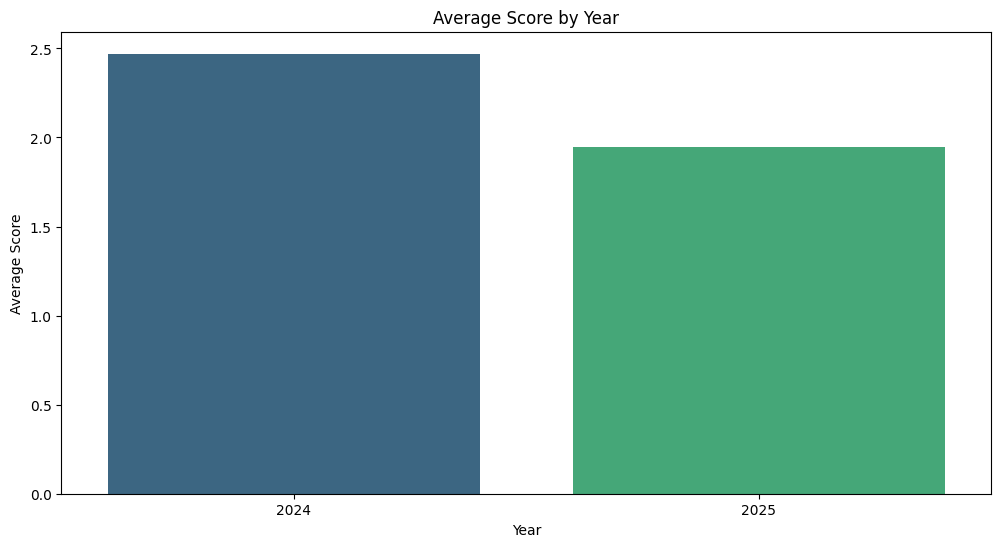

In [ ]:
 # 3. Average score by year
avg_score_by_year = df.groupby('year')['score'].mean().reset_index()
plt.figure(figsize=(12, 6)) # Fixed: Removed unexpected indentation
sns.barplot(x='year', y='score', data=avg_score_by_year, palette='viridis')
plt.title('Average Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.savefig('avg_score_by_year.png')

(0.0, 100.0)

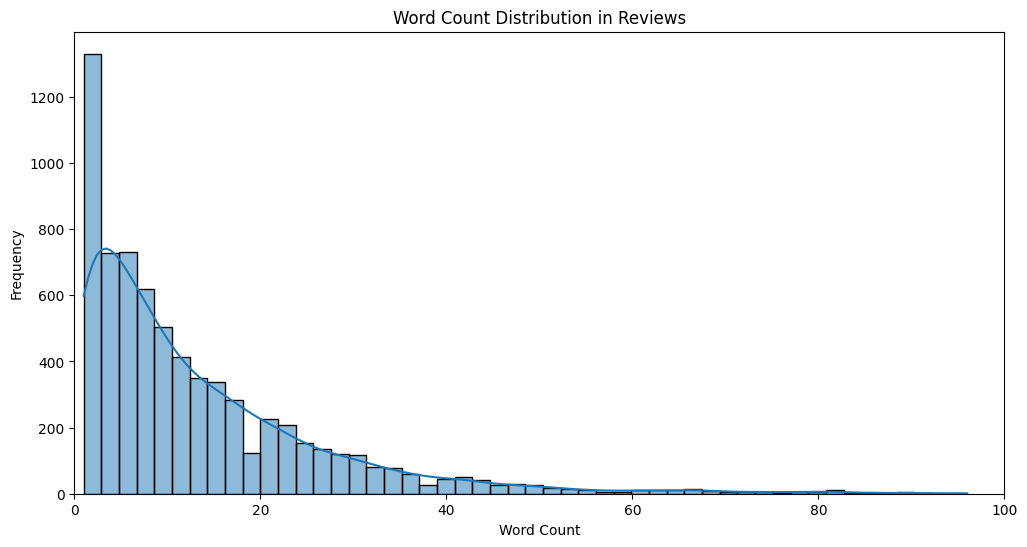

In [ ]:
# 4. Word count distribution in reviews
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('word_count_distribution.png')
plt.xlim(0, 100)  # Limiting x-axis for better visualization
